Import library and Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv('/content/bank-full.csv', sep=';')  # The delimiter is often `;` in UCI datasets
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,durations,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
print(df.info())
print(df['job'].value_counts())
print(df['marital'].value_counts())
print(df['age'].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45210 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45210 non-null  int64 
 1   job        45210 non-null  object
 2   marital    45210 non-null  object
 3   education  45210 non-null  object
 4   default    45210 non-null  object
 5   balance    45210 non-null  int64 
 6   housing    45210 non-null  object
 7   loan       45210 non-null  object
 8   contact    45210 non-null  object
 9   day        45210 non-null  int64 
 10  month      45210 non-null  object
 11  durations  45210 non-null  int64 
 12  campaign   45210 non-null  int64 
 13  pdays      45210 non-null  int64 
 14  previous   45210 non-null  int64 
 15  poutcome   45210 non-null  object
 16  y          45210 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
se

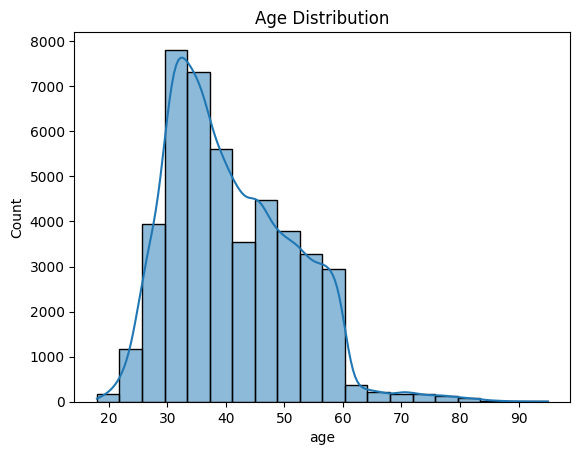

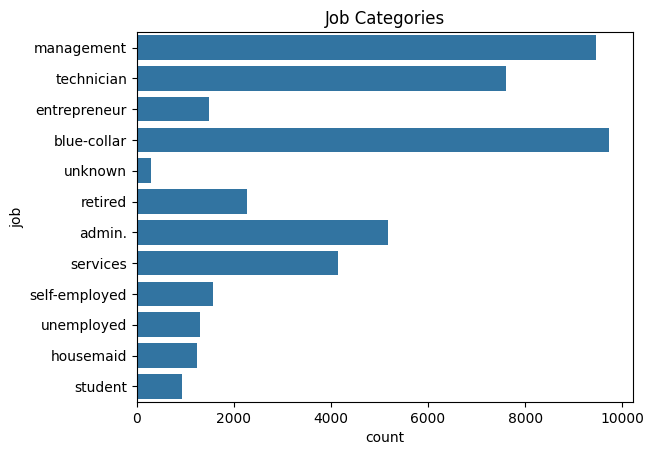

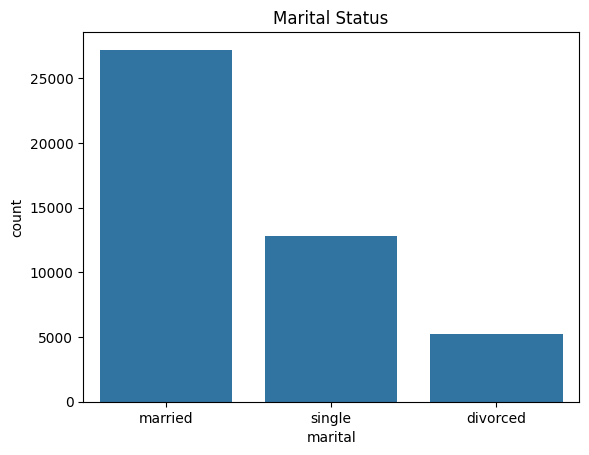

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Job distribution
sns.countplot(y='job', data=df)
plt.title('Job Categories')
plt.show()

# Marital status
sns.countplot(x='marital', data=df)
plt.title('Marital Status')
plt.show()


In [4]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [5]:
X = df_encoded.drop('y_yes', axis=1)  # 'y' is target column (yes/no), becomes 'y_yes' after encoding
y = df_encoded['y_yes']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))



Logistic Regression:
Accuracy: 0.8961512939615129
[[7748  201]
 [ 738  355]]
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      7949
        True       0.64      0.32      0.43      1093

    accuracy                           0.90      9042
   macro avg       0.78      0.65      0.69      9042
weighted avg       0.88      0.90      0.88      9042



In [13]:
import numpy as np



In [14]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

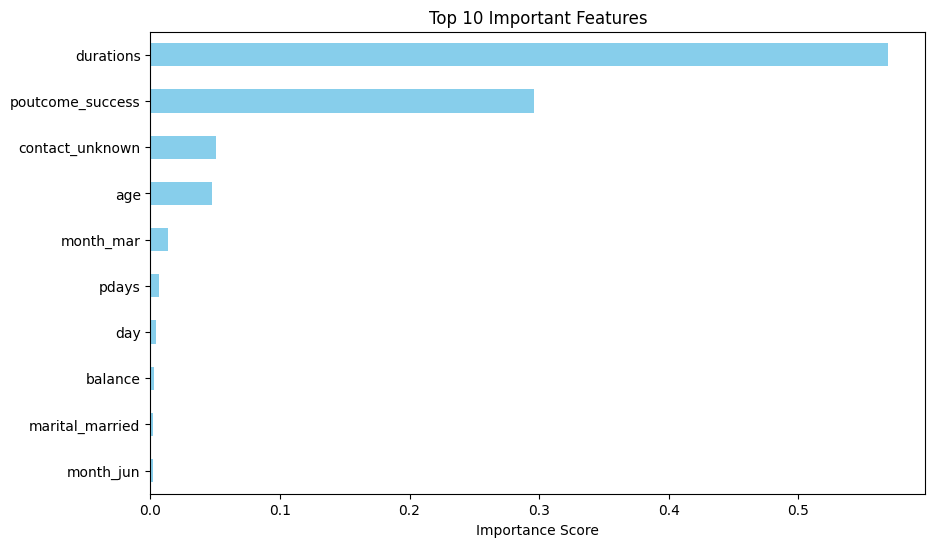

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance
feature_importance = pd.Series(dt.feature_importances_, index=X.columns)
important_features = feature_importance.sort_values(ascending=False).head(10)

# Plot
important_features.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()
